In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import scipy.stats as sp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stats Project - Amisha, Sourabh/Health Preferences Survey  (Responses) - Form responses 1.csv')

In [ ]:
data.shape

(52, 16)

In [ ]:
data.head()

,Timestamp,Gender,Age,Your Height (In Ft),Your weight,Location,Level of Education,"How would you describe your own health, in general?",How many hours of sleep per night do you average?(Since Covid-19),Has your sleeping hours changed because of Covid-19?(Based on your previous response),Do you eat healthy food?(Leafy Vegetables/Fruits/Meat/Eggs),How many times in a week do you eat outside food ?,Has there been any change in your diet because of Covid-19?(Based on your previous response),"On average, how many times in a week do you exercise / workout / yoga / meditation ?",Based on the above question have u started doing exercise / workout / yoga / meditation because of Covid-19?,Are you suffering from any of the below issues? (Optional)
0,13/12/2021 15:58:09,Female,18-25,NaN,NaN,Maharastra,Post Graduate degree,Good,6-8 hrs,Yes i sleep more,Yes,3,Yes i try to eat healthy diet as much as possi...,1,I don't exercise(Before & After),None of the Above
1,13/12/2021 16:16:05,Male,18-25,6.0,75.0,Maharastra,Bachelor's degree,Good,6-8 hrs,no change,Yes,3,Yes i try to eat healthy diet as much as possi...,1,I don't exercise(Before & After),None of the Above
2,13/12/2021 16:16:52,Male,18-25,5.4,50.0,Maharastra,Post Graduate degree,Good,6-8 hrs,Yes i sleep more,Yes,3,Yes i try to eat healthy diet as much as possi...,1,I don't exercise(Before & After),None of the Above
3,13/12/2021 16:17:06,Male,18-25,6.0,60.0,Maharastra,Bachelor's degree,Very good,8 or more,Yes i sleep more,Yes,3,Yes i try to eat healthy diet as much as possi...,6,I used to do them before but not now,Stress/anxiety/depression
4,13/12/2021 16:17:23,Male,18-25,5.7,70.0,Maharastra,Bachelor's degree,Very good,6-8 hrs,Yes i sleep less,Yes,4,I eat to fill my stomach i dont care what i eat.,1,I don't exercise(Before & After),Overweight/obesity


# Dropping Extra columns

In [ ]:
data.drop(['Timestamp','Are you suffering from any of the below issues? (Optional)'],inplace=True, axis=1)

# Changing Column Names

In [ ]:
data.columns = ['Gender','Age','Height','Weight','Location','EducationLevel','OwnHealthRating','AverageSleep','SleepChangeSinceCOVID','OwnDiet','OutsideFoodCount','DietChangeSinceCOVID','AverageExercise','ExerciseChangeSinceCOVID']

**Categorical Data:** Age(O), Location(N), EducationLevel(O), Gender(N), OwnHealthRating(O), SleepChangesSinceCOVID(N), AverageSleep(O), OwnDiet(N), DietChangesSincesCOVID(N), ExerciseChangesSinceCOVID(N), Existing Issues(N) 

**Continuous Data:** Height, Weight, OutsideFoodCount, AverageExercise

In [ ]:
data.nunique()

Gender                       2
Age                          4
Height                      18
Weight                      27
Location                     6
EducationLevel               5
OwnHealthRating              5
AverageSleep                 3
SleepChangeSinceCOVID        4
OwnDiet                      2
OutsideFoodCount             7
DietChangeSinceCOVID         4
AverageExercise             11
ExerciseChangeSinceCOVID     4
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    52 non-null     object 
 1   Age                       52 non-null     object 
 2   Height                    48 non-null     float64
 3   Weight                    48 non-null     float64
 4   Location                  52 non-null     object 
 5   EducationLevel            52 non-null     object 
 6   OwnHealthRating           52 non-null     object 
 7   AverageSleep              52 non-null     object 
 8   SleepChangeSinceCOVID     52 non-null     object 
 9   OwnDiet                   52 non-null     object 
 10  OutsideFoodCount          52 non-null     int64  
 11  DietChangeSinceCOVID      52 non-null     object 
 12  AverageExercise           52 non-null     int64  
 13  ExerciseChangeSinceCOVID  52 non-null     object 
dtypes: float64(2

# EDA

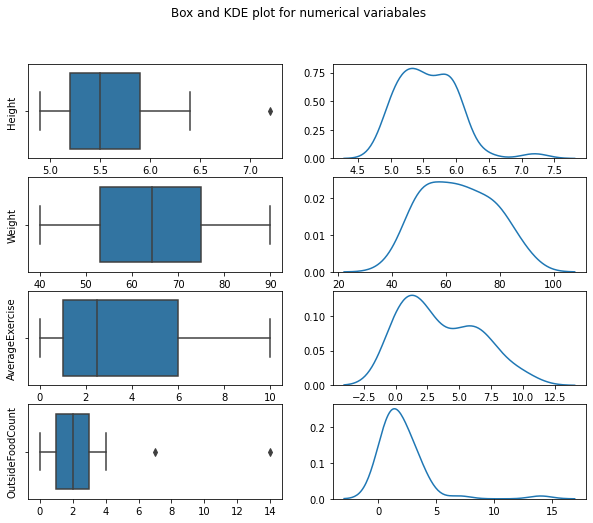

In [ ]:
# Understanding distribution of numerical data using box and kde plot
# Checking for outliers
plt.figure(figsize=(10,8))
plt.subplot(421)
sns.boxplot(data=data,x='Height')
plt.ylabel("Height")
plt.xlabel("")
plt.subplot(422)
sns.kdeplot(data=data,x='Height')
plt.xlabel("")
plt.ylabel("")
plt.subplot(423)
sns.boxplot(data=data,x='Weight')
plt.ylabel("Weight")
plt.xlabel("")
plt.subplot(424)
sns.kdeplot(data=data,x='Weight')
plt.xlabel("")
plt.ylabel("")
plt.subplot(425)
sns.boxplot(data=data,x='AverageExercise')
plt.ylabel("AverageExercise")
plt.xlabel("")
plt.subplot(426)
sns.kdeplot(data=data,x='AverageExercise')
plt.xlabel("")
plt.ylabel("")
plt.subplot(427)
sns.boxplot(data=data,x='OutsideFoodCount')
plt.ylabel("OutsideFoodCount")
plt.xlabel("")
plt.subplot(428)
sns.kdeplot(data=data,x='OutsideFoodCount')
plt.ylabel("")
plt.xlabel("")
plt.suptitle("Box and KDE plot for numerical variabales")
plt.show()

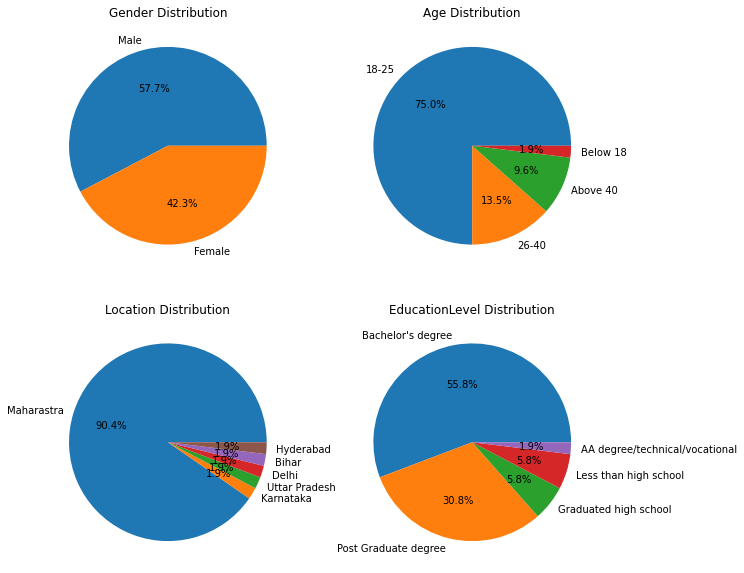

In [ ]:
# Gender,Age,Location and EducationLevel Distribution
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.pie(data['Gender'].value_counts(),labels=data['Gender'].value_counts().index,autopct='%.1f%%')
plt.title("Gender Distribution")

plt.subplot(222)
plt.pie(data['Age'].value_counts(),labels=data['Age'].value_counts().index,autopct='%.1f%%')
plt.title("Age Distribution")

plt.subplot(223)
plt.pie(data['Location'].value_counts(),labels=data['Location'].value_counts().index,autopct='%.1f%%')
plt.title("Location Distribution")

plt.subplot(224)
plt.pie(data['EducationLevel'].value_counts(),labels=data['EducationLevel'].value_counts().index,autopct='%.1f%%')
plt.title("EducationLevel Distribution")

plt.show()

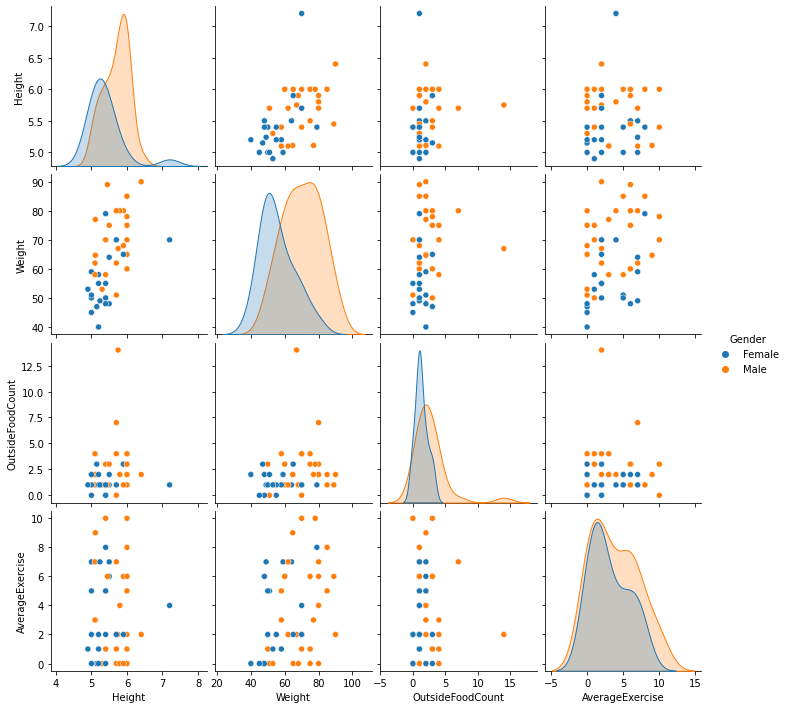

In [ ]:
# Weight and AverageExercise show a linear relationship
sns.pairplot(data, hue = 'Gender')
plt.show()

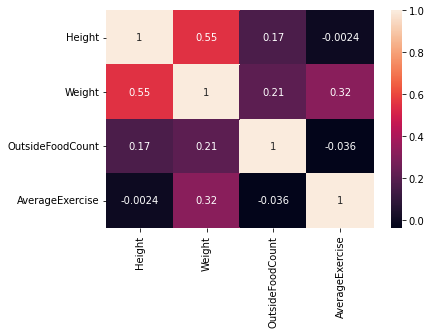

In [ ]:
# Features are not correlated !!!! Yay !!!!
sns.heatmap(data.corr(), annot=True)
plt.show()

# Removing Null Values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    52 non-null     object 
 1   Age                       52 non-null     object 
 2   Height                    48 non-null     float64
 3   Weight                    48 non-null     float64
 4   Location                  52 non-null     object 
 5   EducationLevel            52 non-null     object 
 6   OwnHealthRating           52 non-null     object 
 7   AverageSleep              52 non-null     object 
 8   SleepChangeSinceCOVID     52 non-null     object 
 9   OwnDiet                   52 non-null     object 
 10  OutsideFoodCount          52 non-null     int64  
 11  DietChangeSinceCOVID      52 non-null     object 
 12  AverageExercise           52 non-null     int64  
 13  ExerciseChangeSinceCOVID  52 non-null     object 
dtypes: float64(2

In [ ]:
# Height, Weight has NULL values
# Replacing Height with median as it contains an outlier
data['Height'].fillna(np.nanmedian(data['Height']), inplace = True)

In [ ]:
# Replacing Weight with mean as data is normally distributed
data['Weight'].fillna(np.mean(data['Weight']),inplace=True)

**Inferential:** 
1. What percent of population think that they live a healthy lifestyle?
2. What percent of population gets adequate sleep?
3. On what percent of population's sleeping pattern did COVID impact?
4. What is the average count that the population eats outside food in a week?
5. On what percent of population's diet did COVID impact? 
6. What is the average count that the population exercises in a week?  
7. What proportion of the population exercise?  
8. On what percent of population, did COVID impact the populations exercise routine?
9. Is the sample's BMI aligned with expected population BMI based on age group?
10. Did COVID have any impact on people's health/nutritional beliefs...?

# 1. What percent of population think that they live a healthy lifestyle?

Here, we are trying to estimate the proportion of individuals in the population who believe that they live a healthy lifestyle.

In [ ]:
# Getting the ratings from the dataframe
p1 = data['OwnHealthRating']
# Finding the proportion of people who have rated their health as Good or Above Good
healthy_prop = p1[(p1!='Fair') & (p1 != 'Poor')].value_counts().sum() / len(data)

In [ ]:
# Calculating the standard error
standard_error = 1.96 * (healthy_prop*(1-healthy_prop)/len(data))**(1/2)

In [ ]:
# Displaying the confidence interval of people who believe that they live a healthy lifestyle
print((healthy_prop - standard_error),"-",(healthy_prop + standard_error))

0.7480869595575029 - 0.9442207327501894


**Inference:**  
*We can say with 95% confidence that 75% - 94% of the population believe that they live a health lifestyle.*

# 2.What percent of population gets adequate sleep?

Here based on the population we estimated the proportion of individuals in population getting adequate sleep.

In [ ]:
# Getting the Average Sleep responses from the dataframe
p2=data['AverageSleep']
# Finding the proportion of people who are sleeping adequatly
# People sleeping for 6-8 hours or more are sleeping adepquatly
adeq_sleep=p2[(p2!='Less than 4') & (p2!='4-6 hrs')].value_counts().sum()/len(data)

In [ ]:
# Calculating the standard error
standard_error = 1.96 * (adeq_sleep*(1-adeq_sleep)/len(data))**(1/2)

In [ ]:
# Displaying the confidence interval of people who get adequate sleep
print((adeq_sleep - standard_error),"-",(adeq_sleep + standard_error))

0.6774573600330467 - 0.8994657168900302


**Inference:**  
*We can say with 95% confidence that 67% - 89% of the population gets adequate sleep.*

### For people who have answered 'Yes I sleep more' or 'no change', are they getting adequet sleep since COVID or are they sleep more?

In [ ]:
# Filtering the dataframe to get people who said that they are sleeping more or there is no change in their sleep schedule
# We then took the Average Sleep data for those people
a1=data[(data['SleepChangeSinceCOVID']!='Yes i sleep less')&(data['SleepChangeSinceCOVID']!='I dont\'t care')]['AverageSleep']
# Calculating the proportion of people who are getting 6-8 hrs of sleep among the above filtered sample
a3=a1.value_counts()[0]/a1.value_counts().sum()

6-8 hrs      24
8 or more    11
4-6 hrs       9
Name: AverageSleep, dtype: int64

In [ ]:
# Calculating the standard error
standard_error=1.96*(a3*(1-a3)/len(a1))**(1/2)

In [ ]:
# Displaying the confidence interval of people who's sleep schedule was affected by COVID positively
# or have had no change but are getting the right amount of sleep 
print((a3 - standard_error),"-",(a3 + standard_error))

0.398325751387659 - 0.6925833395214318


**Inference:**  
Here with 95% Confidence Interval we can say that 39%-69% of Population who are now sleeping more or have had no change in their sleep schedule since covid are getting the right amount of sleep.

# 3.On what percent of population's sleeping pattern did COVID impact?

Here based on the population we estimated the proportion of individuals in population whose sleeping pattern was affected by Covid.

In [ ]:
# Getting the SleepChangesSinceCOVID responses from the dataframe
p3 = data["SleepChangeSinceCOVID"]
# Finding the proportion of people experienced a change in their sleeping pattern since COVID
sleep_chng = p3[(p3!="no change") & (p3 != "I don't care")].value_counts().sum() / len(data)

In [ ]:
# Calculating the standard error
standard_error = 1.96 * (sleep_chng*(1-sleep_chng)/len(data))**(1/2)

In [ ]:
# Displaying the confidence interval of people who's sleep pattern has been impacted since COVID
print((sleep_chng - standard_error),"-",(sleep_chng + standard_error))

0.3073138456197602 - 0.5773015389956244


**Inference:**  
*We can say with 95% confidence that 30% - 57% of the population's sleep pattern was impacted by covid.*



# 4.What is the average count that the population eats outside food in a week?



In [ ]:
# Calculating the average number of times people are eating outside food in a week
p4_mean= data['OutsideFoodCount'].mean()
p4_std = np.std(data['OutsideFoodCount'],ddof=1)

In [ ]:
standard_error=1.96*p4_std/(len(data))**(1/2)

In [ ]:
# Displaying the confidence interval of the average count that people eat outside food
print((p4_mean - standard_error),"-",(p4_mean + standard_error))

1.4719793287512863 - 2.6434052866333286


**Inference:**  
*On an average the population eats atleast 2-3 times in a week outside food.*





### For people who say that they eat healthy food, what is the average number of times that they eat outside food?

In [ ]:
a2_mean=data[(data['OwnDiet']!='No')&(data['OwnDiet']!='Maybe')]['OutsideFoodCount'].mean()
a2_std=np.std(data[(data['OwnDiet']!='No')&(data['OwnDiet']!='Maybe')]['OutsideFoodCount'],ddof=1)

In [ ]:
standard_error=1.96*a2_std/(len(data))**(1/2)

In [ ]:
# Displaying the confidence interval of the average count that people who eat healthy are eating outside food
print((a2_mean - standard_error),"-",(a2_mean + standard_error))

1.4453497193899374 - 2.213186865975916


**Inference:**  
*We can say with 95% confidence, that people who believe that they eat healthy still eat outside food atleats 1-2 times in a week.*

# 5. On what percent of population's diet did COVID impact positively?

In [ ]:
# Getting the DietChangeSinceCOVID responses from the dataframe
p5 = data["DietChangeSinceCOVID"]
# Calculating the proportion of people who have started eating healthy since COVID
diet_chng = p5[(p5!="No Junk food is my comfort food.") & (p5 != "I eat to fill my stomach i dont care what i eat.")].value_counts().sum() / len(data)

In [ ]:
# Calculating the standard error
standard_error = 1.96 * (diet_chng*(1-diet_chng)/len(data))**(1/2)

In [ ]:
# Displaying the confidence interval of people who are eating healthy food since COVID
print((diet_chng - standard_error),"-",(diet_chng + standard_error))

0.7480869595575029 - 0.9442207327501894


**Inference:**  
*We can say with 95% confidence that 74% - 94% of the population are eating healthy food.*

# 6. What is the average count that the population exercises in a week?
Assuming that people should exercise atleast 5 days in a week to stay healthy, we are trying to see if the same is true for the population or not.  
  
H0: People exercise atleast 5 days in a week (mean >= 5)
  
Ha: People exercise less than 5 days in a week (mean < 5)

In [ ]:
x1 = data['AverageExercise'].mean() # Sample mean of average exercise
s1 = np.std(data['AverageExercise'],ddof=1) # Sample STD of average exercise
print("Mean:",x1)
print("STD:",s1)

Mean: 3.519230769230769
STD: 2.9604609114876785


In [ ]:
# Left tailed test
# Calculating z actual using sample mean and STD
z = (x1 - 5) / (s1/(len(data)**(1/2)))
print("Z Actual:",z)

-3.6068636258297384

In [ ]:
#Calculating p value
pact = sp.norm.cdf(z)
print("pcrit: 0.05")
print("pact:",pact)

pcrit: 0.05
pact: 0.00015496021925382852


**Inference:**  
*Since pact<pcrit, we will reject the Null Hypothesis. Hence we can say that we have enough statistical evidence to prove that people exercise less than 5 days in a week.*

# 7. What proportion of the population exercise?
Here, we are trying to find the confidence interval for the proportion of population who exercise.

In [ ]:
# Calculating proportion of people who are exercising by removing those data points where average exercise = 0
e1 = 1-(data[data['AverageExercise']==0]['AverageExercise'].count() / len(data))

In [ ]:
# Calculating standard error
standard_error = 1.96 * (e1*(1-e1)/len(data))**(1/2)

In [ ]:
# Displaying the confidence interval
print((e1 - standard_error),"-",(e1 + standard_error))

0.7005710406043021 - 0.9148135747803133


**Inference:**  
*After analysing the proportion of people who exercise >=1 times in a week, we can say with 95% confidence that 70% - 91% of the population exercise or used to exercise.*

In [ ]:
# Not to be used for report
# Analysing exercise routine either before or after COVID
p7 = data['ExerciseChangeSinceCOVID']
l = ['I don\'t exercise(Before & After)']
exercise_prop = p7[(p7 != l[0])].value_counts().sum() / len(data)
#data['OwnHealthRating'].value_counts()
exercise_prop

0.8076923076923077

In [ ]:
# Analysing exercise routine after COVID
p7 = data['ExerciseChangeSinceCOVID']
l = ['I don\'t exercise(Before & After)','I used to do them before but not now']
exercise_prop = p7[(p7 != l[0]) & (p7 != l[1])].value_counts().sum() / len(data)
#data['OwnHealthRating'].value_counts()
exercise_prop

0.5192307692307693

In [ ]:
# Calculating Standard error
standard_error = 1.96 * (exercise_prop*(1-exercise_prop)/len(data))**(1/2)

In [ ]:
# Displaying the confidence interval
print((exercise_prop - standard_error),"-",(exercise_prop + standard_error))

0.3834297772537627 - 0.6550317612077758


**Inference:**  
*We can say with 95% confidence that 43% - 61% of the population is exercising after COVID.*

Here there is a drop in the proportion of people who are exercising after/since covid and those who used to exercise before covid.

In [ ]:
# Not to be used for report
mew = data[(data['ExerciseChangeSinceCOVID']=='I used to do them before but not now')]['AverageExercise'].mean()
st = np.std(data[(data['ExerciseChangeSinceCOVID']=='I used to do them before but not now')]['AverageExercise'],ddof=1)

In [ ]:
# Not to be used for report
standard_error = 1.96 * st/(15)**(1/2)
print((mew - standard_error),"-",(mew + standard_error))

1.5165587262493245 - 3.9501079404173423


*On an average, people who used to exercise before but have stopped since COVID, used to exercise 2-4 days in a week.*

# 8. On what percent of population, did COVID impact the populations exercise routine?


In [ ]:
# Getting the proportion of people who have started exercising just after COVID
pcap = p7[(p7=='I never exercised before but i do now')].value_counts().sum() / len(data)
pcap

0.17307692307692307

In [ ]:
standard_error = 1.96 * (pcap*(1-pcap)/len(data))**(1/2)
print((pcap - standard_error),"-",(pcap + standard_error))

0.07025007151609924 - 0.2759037746377469


**Inference:**  
*We can say with 95% confidence that 7% to 27% of the population who did not exercise before has started exercising since COVID.*

In [ ]:
# Not to be used for report
mew = data[(data['ExerciseChangeSinceCOVID']=='I never exercised before but i do now')]['AverageExercise'].mean()
st = np.std(data[(data['ExerciseChangeSinceCOVID']=='I never exercised before but i do now')]['AverageExercise'],ddof=1)

In [ ]:
# Not to be used for report
standard_error = 1.96 * st/(15)**(1/2)
print((mew - standard_error),"-",(mew + standard_error))

4.0350049730118265 - 7.076106138099284


*We can say with 95% confidence that people who started exercising since COVID exercise on a average 4-7 times in a week.*

In [ ]:
# Not to be used for report
mew = data[(data['ExerciseChangeSinceCOVID']=='I used to do them before as well as  now')]['AverageExercise'].mean()
st = np.std(data[(data['ExerciseChangeSinceCOVID']=='I used to do them before as well as  now')]['AverageExercise'],ddof=1)

In [ ]:
# Not to be used for report
standard_error = 1.96 * st/(15)**(1/2)
print((mew - standard_error),"-",(mew + standard_error))

3.5796626376602037 - 6.198115140117575


*We can say with 95% confidence that people who have been exercising since before and after COVID, exercise on a average 4-6 times in a week.*

In [ ]:
# Here, we are trying to understand if the effect COVID had on people who used to exercise before 
# and those who did not exercise before is the same or not

# H0: COVID affected people who exercised before and those who did not exercise before equally. (p1-p2 = 0)
# Ha: COVID did not affect people who exercised before and those who did not exercise before equally. (p1-p2 != 0)

l1 = ['I used to do them before as well as  now','I used to do them before but not now']
l2 = ['I don\'t exercise(Before & After)','I never exercised before but i do now']

prop_before = p7[(p7!=l2[0]) & (p7 != l2[1])].value_counts().sum() / len(data)
prop_not_before = 1-prop_before
print("Proportion of sample who used to exercise before:",prop_before)
print("Proportion of sample who did not exercise before:",prop_not_before)
# p1
prop_before_change = p7[(p7!=l2[0]) & (p7 != l2[1])].value_counts()[1] / p7[(p7!=l2[0]) & (p7 != l2[1])].value_counts().sum()
print("Proportion of people who used to exercise before but have changed:",prop_before_change)
# p2
prop_not_before_change = p7[(p7!=l1[0]) & (p7!=l1[1])].value_counts()[1] / p7[(p7!=l1[0]) & (p7 != l1[1])].value_counts().sum()
print("Proportion of people who did not exercise before but have changed:",prop_not_before_change)

Proportion of sample who used to exercise before: 0.6346153846153846
Proportion of sample who did not exercise before: 0.3653846153846154
Proportion of people who used to exercise before but have changed: 0.45454545454545453
Proportion of people who did not exercise before but have changed: 0.47368421052631576


In [ ]:
n1 = p7[(p7!=l2[0]) & (p7 != l2[1])].value_counts().sum() # Count of people who used to exercise before
n2 = p7[(p7!=l1[0]) & (p7!=l1[1])].value_counts().sum() # Count of people who did not exercise before
pbar = ((n1 * prop_before_change) + (n2 * prop_not_before_change)) / (n1+n2)
qbar = 1-pbar

In [ ]:
# Calculating the t value
t = ((prop_before_change-prop_not_before_change) - 0) / (pbar*qbar*(1/n1)*(1/n2))**(1/2)

In [ ]:
pact = 1-sp.t.cdf(t,(n1+n2-1))
print("pact: ",pact)
print("pcrit: 0.025")

pact:  0.8295354528329282
pact: 0.025


**Inference:**  
*With 95% confidence, we can say that the proportion of people who exercised before but changed and those who did not exercise before but changed since COVID is significantly same.*

# 9. Is the sample's BMI aligned with expected population BMI based on age group?

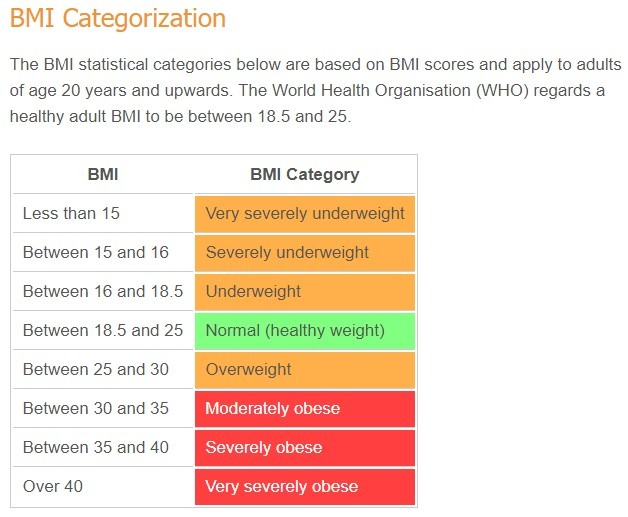

In [ ]:
# Creating a new column to store BMI using height and weight
data['BMI'] = data['Weight'] / (data['Height']*0.3048)**2
# Calculating sample mean and standard deviation of BMI
sample_bmi_mean = data['BMI'].mean()
sample_bmi_std = np.std(data['BMI'],ddof=1)
# Displaying sample mean and STD
print("BMI Mean:",sample_bmi_mean)
print("BMI STD:",sample_bmi_std)

BMI Mean: 22.340439200058746
BMI STD: 3.6678265618962027


In [ ]:
# Calculating standard error
standard_error = 1.96 * sample_bmi_std/(len(data))**(1/2)
# Displaying confidence interval of BMI for the population
print((sample_bmi_mean - standard_error),"-",(sample_bmi_mean + standard_error))

21.34351258439282 - 23.337365815724674


**Inference:**  
*We can say with 95% confidence that the population consists of individuals who fall in the 'Normal' BMI category and have healthy weight.*

# 10. Did COVID have any impact on people's health/nutritional beliefs...?

H0: Impact of COVID on people health/nutritional beliefs is not dependent on factors such as sleep, diet and exercise.
  
Ha: Impact of COVID on people health/nutritional beliefs is  dependent on factors such as sleep, diet and exercise.

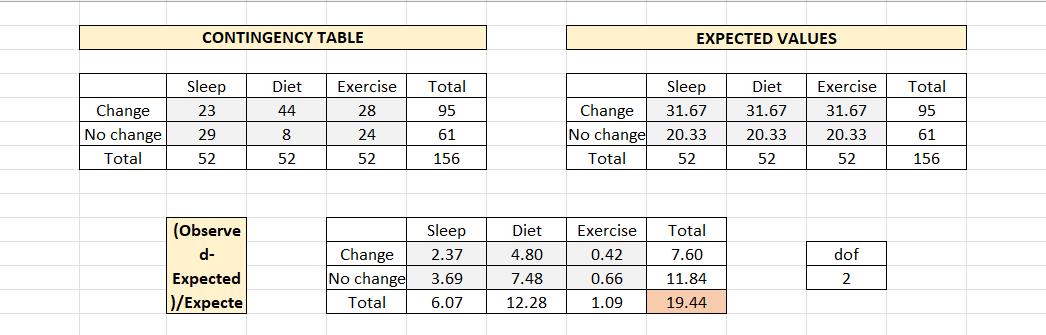

In [ ]:
# Calculating the p value for chisquare value 19.44 and DOF 2
pact = 1 - sp.chi2.cdf(19.44,2)
pcrit = 0.05
print("pact:",pact)
print("pcrit:",pcrit)

pact: 6.007000054675249e-05
pcrit: 0.05


**Inference:**  
*Since pact<pcrit, we will reject null hypothesis. Hence we can conclude that impact of COVID on people's health/nutritional beliefs is dependent on factors such as change in sleeping pattern, dietary changes and changes in exercise routine.*

# Linear Regression

In [ ]:
# Gender, Age, Height, OutsideFoodCount, Average Exercise
data1 = data[['Gender','Height','OutsideFoodCount','AverageExercise','Weight']]
# One Hot Encoding Gender
data1 = pd.get_dummies(data1, drop_first = True)

In [ ]:
data1.head()

,Height,OutsideFoodCount,AverageExercise,Weight,Gender_Male
0,5.5,3,1,64.452083,0
1,6.0,3,1,75.000000,1
2,5.4,3,1,50.000000,1
3,6.0,3,6,60.000000,1
4,5.7,4,1,70.000000,1


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Height            52 non-null     float64
 1   OutsideFoodCount  52 non-null     int64  
 2   AverageExercise   52 non-null     int64  
 3   Weight            52 non-null     float64
 4   Gender_Male       52 non-null     uint8  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 1.8 KB


In [ ]:
X = data1.drop('Weight',axis=1)
y = data1['Weight']

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)

In [ ]:
result = sm.OLS(y, X).fit()

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     12.46
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           5.47e-07
Time:                        13:07:46   Log-Likelihood:                -185.34
No. Observations:                  52   AIC:                             380.7
Df Residuals:                      47   BIC:                             390.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -14.4981     17.267  

In [ ]:
data2 = data1.drop(['OutsideFoodCount'],axis=1)

In [ ]:
X = data2.drop('Weight',axis=1)
y = data2['Weight']

In [ ]:
X = sm.add_constant(X)

In [ ]:
result = sm.OLS(y, X).fit()

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     16.88
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           1.28e-07
Time:                        13:08:33   Log-Likelihood:                -185.42
No. Observations:                  52   AIC:                             378.8
Df Residuals:                      48   BIC:                             386.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -14.5774     17.109     

In [ ]:
'''
H0:β0=0, with HA:β0≠0 ; and
H0:βx=0, with HA:βx≠0
Since p value of constant term is not significant, we can say that the intercept term might be 0
'''